# Задача классификации

## Линейная классификация

Закодируем виды цветков Ириса метками класса:

iris setosa: -1

iris virginica: 1

Запишем метки класса в переменную $y$

In [7]:
y = kind_iris.copy() #!Зачем вызывается метод copy?
y[y=='iris setosa'] = -1
y[y=='iris virginica'] = 1
y = y.astype(int)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


Отлично. Теперь у нас есть признаки и численная переменная, которую требуется предсказать

In [8]:
print_data(X,y)

    Длина чашелистника  Ширина чашелистника  Вид Ириса
0                  5.1                  3.5       -1.0
1                  4.9                  3.0       -1.0
2                  4.7                  3.2       -1.0
3                  4.6                  3.1       -1.0
4                  5.0                  3.6       -1.0
5                  5.4                  3.9       -1.0
6                  4.6                  3.4       -1.0
7                  5.0                  3.4       -1.0
8                  4.4                  2.9       -1.0
9                  4.9                  3.1       -1.0
10                 5.4                  3.7       -1.0
11                 4.8                  3.4       -1.0
12                 4.8                  3.0       -1.0
13                 4.3                  3.0       -1.0
14                 5.8                  4.0       -1.0
15                 5.7                  4.4       -1.0
16                 5.4                  3.9       -1.0
17        

Для предсказания меток класса по нашим двум признакам, попробуем воспользоваться уже известным нам методом *линейная регрессия*:
\begin{equation*}
\tilde{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2.
\end{equation*}
$\tilde{y}$ - Ответ модели  
$x_1$ - Длина чашелистника  
$x_2$ - Ширина чашелистника  
$\theta_0, \theta_1, \theta_2$ - параметры модели (веса)

Но как мы знаем, линейная регрессия выдает ответы в непрерывном диапазоне, а нам нужны ответы принимающие значения -1 или 1.

Для решения этой проблемый воспользуемся функцией знака от ответов линейной регрессии:

\begin{equation*}
\tilde{y} = sign(\theta_0 + \theta_1 x_1 + \theta_2 x_2), \\
 sign(t) = 
 \begin{cases}
   1, &\text{t > 0}\\
   0, &\text{t = 0}\\
   -1, &\text{t < 0}
 \end{cases}
\end{equation*}

\begin{equation*}
 sign(t) = 
 \begin{cases}
   1, &\text{t > 0}\\
   0, &\text{t = 0}\\
   -1, &\text{t < 0}
 \end{cases}
\end{equation*}

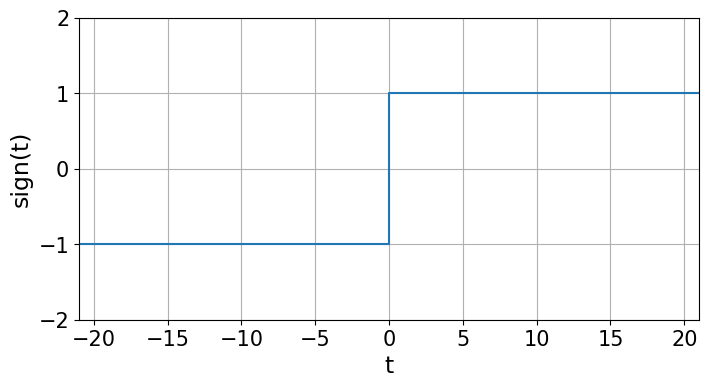

In [9]:
plot_sign()

Избавимся от свободного члена $\theta_0$  и запишим выражение в вектором виде:

\begin{equation*}
{X} = \begin{pmatrix} 1 & x_{1} & x_{2}\end{pmatrix} \\
\Theta = \begin{pmatrix}\theta_0 &  \theta_1 & \theta_2\end{pmatrix}^T \\
\tilde{y}= sign(\begin{pmatrix} 1 & x_{1} & x_{2}\end{pmatrix} \begin{pmatrix}
    \theta_0\\
    \theta_1\\
    \theta_2\\
  \end{pmatrix}) =  sign(1 \cdot \theta_0 + \theta_1 x_{1} + \theta_2 x_{2}) \\
\tilde{y} = sign(X\Theta)
\end{equation*}


### Краткие сведения из линейной алгебры

**Гиперплоскость** - подпространство векторного пространства, размерности на 1 меньше исходного пространства.

Ненулевой вектор $\overline{n}$, ортогональный гиперплоскости, называется нормальным вектором или **нормалью** к этой гиперплоскости.

Пример:
* Плоскость в трехмерном пространстве
* Прямая на плоскости
* Точка на прямой
* Трехмерное пространство в четырехмерном

Так как все векторы принадлежащие гиперплоскости - ортогональны вектору нормали, выпишим 

*общее уравнение гиперплоскости* в $n$ мерном пространстве:
\begin{equation*}
\sum_{i=0}^n A_ix_i = 0, \\
x_0 = 1, \\
\sum_{i=1}^n A_i^2 \neq 0.
\end{equation*}

Вектором нормали $\overline{n}$ к заданной таким образом гиперплоскости, будет вектор:
\begin{equation*}
\overline{n} = (A_1, A_2, ..., A_n)
\end{equation*}

**Пример**: уравнение плоскости в трехмерном пространстве:
\begin{equation*}
A_0 + A_1x_1 + A_2x_2 + A_3x_3 = 0, \\
\overline{n} = (A_1, A_2, A_3)
\end{equation*}

![](gipyerploskosti.jpg?raw=true)

**Расстояние от точки до гиперплоскости**:

Длина ортогональной проекции вектора $\overline{a}$ на вектор $\overline{b}$, считается по формуле:

\begin{equation*}
np_{\overline{b}}\overline{a} = \| \overline{a}\|cos(\widehat{ \overline{a},\overline{b}}) = \dfrac{(\overline{a}, \overline{b})}{\|\overline{b}\|}
\end{equation*}


Пусть требуется посчитать расстояние от точки $M^*$ до гиперплоскости.

Возьмем любую точку $M_0$ принадлежащую данной гиперплоскости.

Тогда расстояние от точки $M^*$ до гиперплоскости будет равно длине ортогональной проекции вектора $\overline{M_0M*}$ на вектор нормали $\overline{n}$.


\begin{equation*}
d = \dfrac{(M^* - M_0,\overline{n})}{\|\overline{n}\|} = \dfrac{(M^*,\overline{n})}{\|\overline{n}\|} - \dfrac{(M_0,\overline{n})}{\|\overline{n}\|} \\
d = \dfrac{(M^*,\overline{n}) + A_0}{\|\overline{n}\|} \\
\end{equation*}

### Геометрический смысл задачи классификации

Мы остановились на том, что опрделили модель классификации, как знак от произведения матрицы признаков на матрицу весов

\begin{equation*}
\tilde{y} = sign(X\Theta)
\end{equation*}

Заметим, что под функцией знака стоит **скалярное произведение** вектора признаков $X$ на вектор весов $\Theta$.

Уравнение $X\Theta = 0$ задает гиперплоскость в пространстве признаков с вектором нормали $\Theta$.


 * Если $X\Theta > 0$, то признаки попали по одну сторону от гиперплоскости

 * Если $X\Theta < 0$, то признаки попали по другую сторону от гиперплоскости.

А это значит, что наш *линейный классификатор*
\begin{equation*}
\tilde{y} = sign(X\Theta),
\end{equation*}

* будет давать метку -1, если точки лежат по одну сторону от гиперплосмкости
* метку 1, если точки лежать по другую сторону от гиперплоскости

Итак, *линейный классификатор* строит **разделяющую гиперплоскость** в пространстве признаков.

Посмотрим, как будет выглядеть разделяющая гиперплоскость для задачи кассификации цветков Ириса


Уравнение гиперплоскости $X\Theta = 0$

In [10]:
plot_data_with_gip(X,kind_iris)

interactive(children=(FloatSlider(value=-0.92533091, description='theta_0: ', max=0.0, min=-1.8, step=0.3), Fl…

Осталось научиться подбирать параметры $\Theta$.

Как и в задачи регрессии, для поиска весов модели $\Theta$, требуется задать функцию ошибки.

Введем следующие обозначения:

$X$ - матрица признаков

$y$ - истинные метки

$X_i = \begin{pmatrix} 1&  x_{i,1} & x_{i,2}\end{pmatrix}$ - признаки $i$-го объекта ($i$-го цветка Ириса)

$y_i \in$ {-1,1} - истинная метка на $i$-м объекте

$\Theta = \begin{pmatrix}\theta_0 &  \theta_1 & \theta_2\end{pmatrix}^T$

Заметим, что произведение $X_i\Theta$ пропорцианально расстоянию от $i$-го объекта до разделяющей гиперплоскости:

\begin{equation*}
d = \dfrac{X_i\Theta}{\|\Theta\|} \sim X_i\Theta
\end{equation*}

Введем понятие отступа на $i$-ом объекте:

\begin{equation*}
M_i = y_i \cdot X_i\Theta
\end{equation*}
Замети, что
* $M_i > 0$, классификатор дал верный ответ

* $M_i < 0$, классификатор ошибся

Причем абсолютное значение отступа $|M_i|$ характеризует уверенность классификатора в ответе,

ведь чем больше $|M_i|$, тем дальше находятся признаки от разделяющей гиперплоскости.

Давайте оценивать ошибку классификации, как **долю неправильных ответв**:
    
\begin{equation*}
L = \dfrac{1}{N}\sum_{i=1}^N [M_i<0],\\
\begin{cases}
[True] = 1, \\
[False] = 0.
\end{cases}
\end{equation*}


Но к сожалению функция $f(M_i) = [M_i < 0]$ разрывна и имеет нулевую производную всюду кроме нуля.

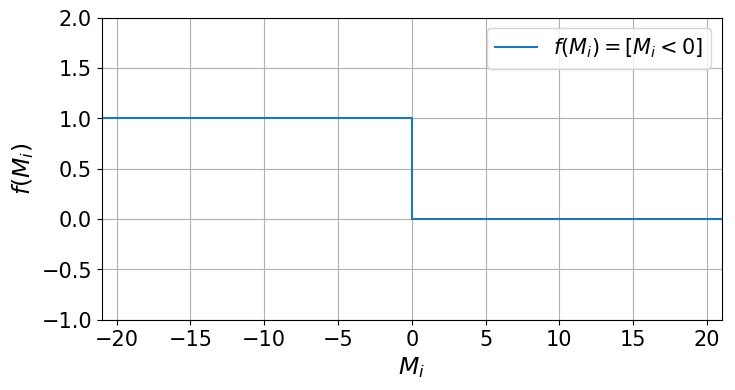

In [11]:
plot_indent()

Минимизировать такую функцию не просто.

Оценим сверху функцию $f(M_i) = [M_i < 0]$ гладкой функцией $g(M_i)$:
    
\begin{equation*}
f(M_i) \leqslant g(M_i)
\end{equation*}

Тогда минимизируя $g(M_i)$, должна минимизироваться и $f(M_i)$:

\begin{equation*}
g(M_i) \xrightarrow {\Theta} min \Rightarrow f(M_i) \xrightarrow {\Theta} min.
\end{equation*}

Тогда суммарная ошибка по обучающей выборке:
\begin{equation*}
L = \dfrac{1}{N}\sum_{i=1}^N [M_i<0] \leqslant \tilde L = \dfrac{1}{N}\sum_{i=1}^N g(M_i).
\end{equation*}



Примеры гладкой функции $g(M_i)$:


1. $[M_i<0] \leqslant (1 - M_i)^2$ - квадратичная аппроксимация
2. $[M_i<0] \leqslant max(0,1 - M_i)$ - кусочно линейная (Hinge loss, метод опорных векторов)
3. $[M_i<0] \leqslant e^{-M_i}$ - экспоненциальная
4. $[M_i<0] \leqslant ln(1 + e^{-M_i})$ - логистическая (Log loss, логистическая регрессия) 

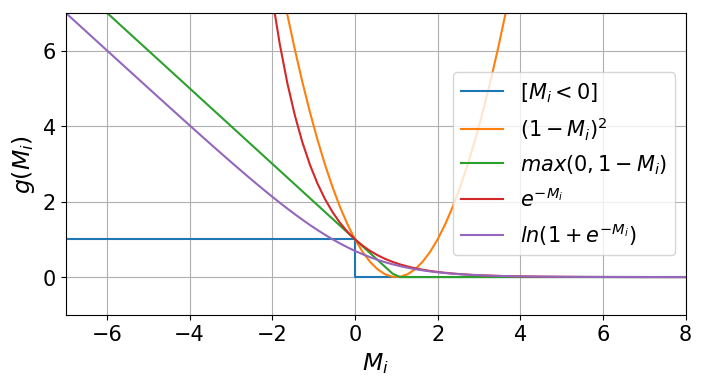

In [12]:
plot_indent_with_maj()

Рассмотрим логистичесскую аппроксимацию $g(M_i) = ln(1 + e^{-M_i})$:

\begin{equation*}
\tilde L = \dfrac{1}{N}\sum_{i=1}^N g(M_i)\\
\tilde L = \dfrac{1}{N}\sum_{i=1}^N ln(1 + e^{-M_i})\\
\tilde L = \dfrac{1}{N}\sum_{i=1}^N ln(1 + e^{-y_i \cdot X_i\Theta})
\end{equation*}

Теперь наша функция гладкая, от нее можно брать производные и искать минимум.

Расчитаем частную производную по всесу $\theta_j$:

\begin{equation*}
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = \dfrac{\partial}{\partial \theta_j}(\dfrac{1}{N} \sum_{i=1}^{N}ln(1 + e^{- y_i \cdot X_i\Theta})
\end{equation*}

\begin{equation*}
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{1}{1 + e^{-y_i \cdot X_i\Theta}}\dfrac{\partial (1 + e^{-y_i \cdot X_i\Theta})}{\partial \theta_j}
\end{equation*}

\begin{equation*}
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}\dfrac{\partial X_i\Theta}{\partial \theta_j}
\end{equation*}

\begin{equation*}
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}x_{i,j}
\end{equation*}

Применим алгоритм градинтного спуска для поиска оптимальных весов

$\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}$  
$\theta_{j_{new}} = \theta_j - \alpha  \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{y_ie^{y_i \cdot X_i \Theta }}{1 + e^{y_i \cdot X_i\Theta}}x_{i,j}$

$x_{i, 0} = 1$

Тогда обновление вектора $\Theta$ будет выглядеть следующим образом:
 
\begin{equation*}
   \theta_{0_{new}} = \theta_0 - \alpha \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}x_{i,0}\\
   \theta_{1_{new}} = \theta_1 - \alpha  \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}x_{i,1}\\
   \theta_{2_{new}} = \theta_2 - \alpha  \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}x_{i,2}
\end{equation*}

Выполняем данную процедуру в цикле заданное число раз, либо пока наши параметры не перестанут изменяться на величину меньшую, чем некоторая нами заданная величина.

Реализуем градиентный спуск с такой функцией ошибки.

Для начала добавим столбец единиц к матрице признаков.

In [13]:
def create_data(X):
    X_ones = np.ones(X.shape[0])
    return np.column_stack([X_ones, X])

X_train = create_data(X)

Зададим начальные параметры весов случайными значениями от 0 до 1:

In [14]:
Theta = np.random.random_sample(size=(X_train.shape[1],))
print(Theta)

[0.40051444 0.35968246 0.95746832]


Реализуем подсчет градиента: $\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}x_{i,j}$

In [15]:
def gradient_function(Theta, X_train, y):
    grad = np.zeros_like(Theta)
    for j in range(Theta.shape[0]):       
        grad[j] = np.mean(X_train[:, j] * (-y)*np.e**(-y * (X_train.dot(Theta)))/(1 + np.e** (-y * (X_train.dot(Theta)))))
    return grad

Градиентный спуск

In [16]:
def gradient_descent(Theta, X_train, y, alpha, iters):        
    theta = Theta
    for i in range (iters):
        theta = theta - alpha * gradient_function(theta, X_train, y)
    return theta

In [17]:
theta_opt = gradient_descent(Theta, X_train, y, 0.01, 1000)

In [18]:
theta_opt

array([-0.07056268,  0.80785022, -1.39828368])

Реализуем линейную модель классификации от наших параметров и данных

In [19]:
def predict_function(X_train, theta):
    y_pred = np.dot(X_train, theta) #X @ Theta
    return np.sign(y_pred)

y_pred = predict_function(X_train, theta_opt)

Реализуем подсчет ошибки (доля неверно классифицированных объектов)

In [20]:
def error(y, y_pred):
    return np.mean(y_pred != y)
error(y, y_pred)

0.01

Итак, мы обучили модель линейной классификации:
\begin{equation*}
y = sign(X\Theta) = sign(\theta_0 + \theta_1x_1 + \theta_2x_2)
\end{equation*}

Модель задает разделяющую гиперплоскость:
\begin{equation*}
\theta_0 + \theta_1x_1 + \theta_2x_2 = 0
\end{equation*}
В случае, когда у нас всего два признака $x_1,x_2$, гиперплоскостью является прямая на плоскости.

Запишем уравнение прямой в привычном виде и построим ее график:

\begin{equation*}
\theta_0 + \theta_1x_1 + \theta_2x_2 = 0 \\
x_2 = \dfrac{-x_1}{\theta_2} - \dfrac{\theta_0}{\theta_2} 
\end{equation*}

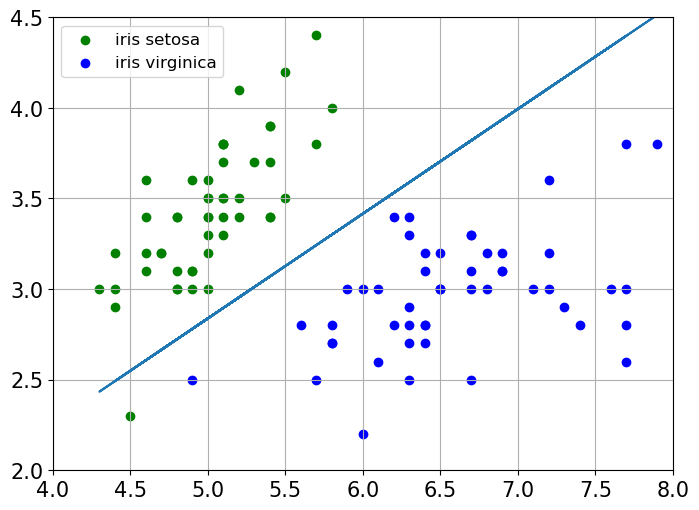

In [21]:
plot_finaly_trained_model(X, kind_iris, theta_opt)

### ДЗ
Реализовать Hinge loss

### Вывод
1. Линейный классификатор проводит разделяющую гиперплоскость в пространстве признаков.
2. При обучении классификатора мы минимизируем долю неверных ответов, но такая функция ошибки разрывна, поэтому мы ее оцениваем сверху гладкой функцией g($\cdot$) и надеемся, что минимизировав g($\cdot$), мы минимизируем и долю неверных ответов.
3. Если ответ классификатора $X\Theta$ > 0 мы ставим метку 1, если $X\Theta$ < 0 ставим метку -1.